IMPORTING ALL THE NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv("/content/Shill Bidding Dataset.csv")
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


DATASET DESCRIPTION : Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand. The price offered by anyone participating in this process is termed as a 'bid'. Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. The goal is to use classification or clustering algorithms to predict the bids in the future.

PARANETERS

1.Record ID: Unique identifier of a record in the dataset.

2.Auction ID: Unique identifier of an auction.

3.Bidder ID: Unique identifier of a bidder.

4.Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.

5.Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.

6.Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

7.Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90% of the auction duration) to avoid winning the auction.

8.Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.

9.Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.

10.Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25% of the auction duration) to get the attention of auction users.

11.Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.

12.Auction Duration: How long an auction lasted.

Class: 0 for normal behaviour bidding; 1 for otherwise.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


We can see that overall the dataset consists of numerical data with one column represented by 'object' data type. Data size is 6321 rows and 12 columns. We also don't have nay missing values.

In [ ]:
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


From the table above we can observe, that values range from 0 to 1 for each feature except Auction_Duration and Auction_ID. Last_Bidding and Auction_Duration seem to follow a normal distribution. Also, I can infer that Winning_Ratio and Successive_Outbidding have lots of observations cluster around either 0 or 1 values. And the dependent variable Class is more represented by 0 class than 1 as mean equals 0.1.

Apply EDA

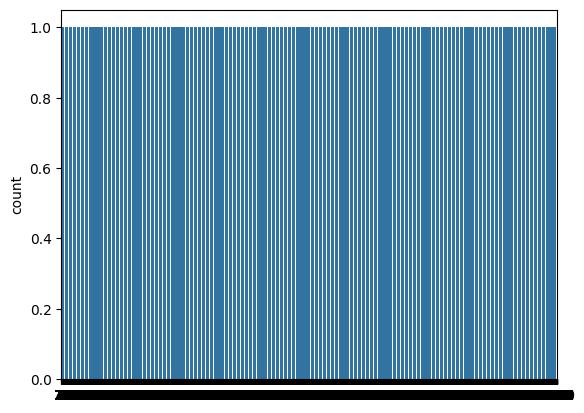

None
Class
0    5646
1     675
Name: count, dtype: int64


In [ ]:
sns.countplot(df['Class'])
print(plt.show())
print(df.Class.value_counts())

With the graph as well as with the value_counts we can confirm that 0 class has 5646 entries while 1 class has only 675 entries.

As the only one object feature we have is a bidder name I want to see if I have any unique values and then decide if we need to keep the feature.

In [ ]:
df.Bidder_ID.value_counts()

Bidder_ID
a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: count, Length: 1054, dtype: int64

We can observe that we have 1054 unique values.

In [ ]:
df = df.drop(columns='Bidder_ID')

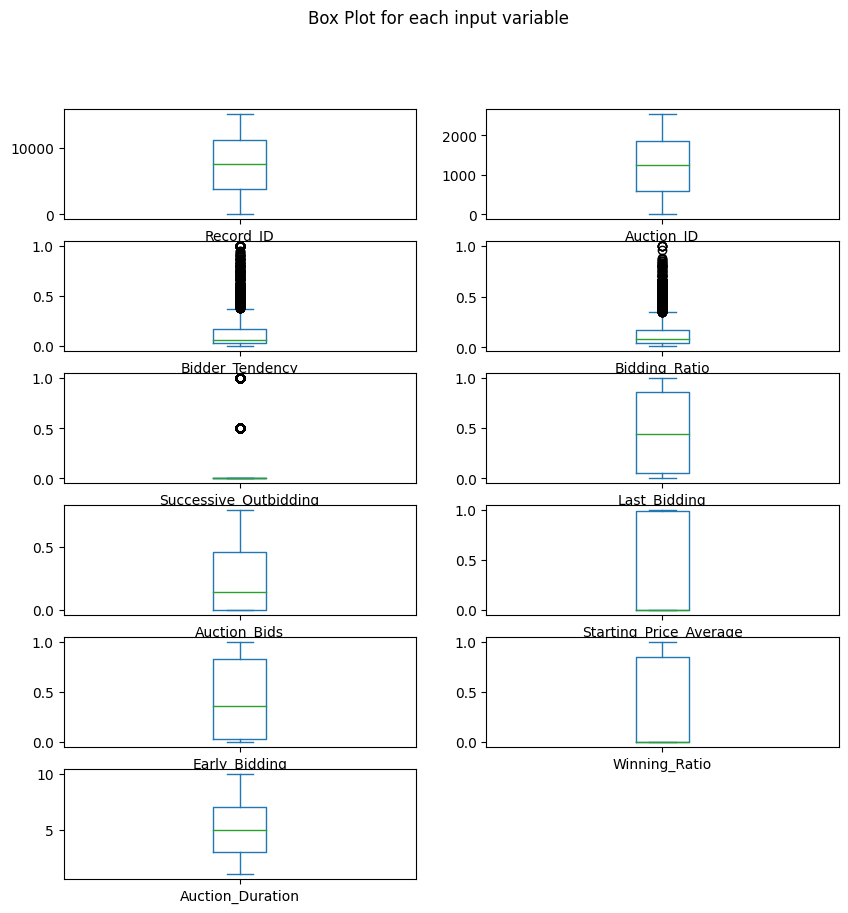

In [ ]:
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

Bidder_Tendency and Bidding_Ratio have many outliers.
Auction_ID, Last_Bidding, Early_Bidding and Auction_Duration have followed normal distribution.
It has been infered earlier that Winning_Ratio and Starting_Price_Average have values mostly clustered around 0 and 1.
3rd parameter is Successive_Outbidding as it shows that we migh have outliers.

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Probability Density')

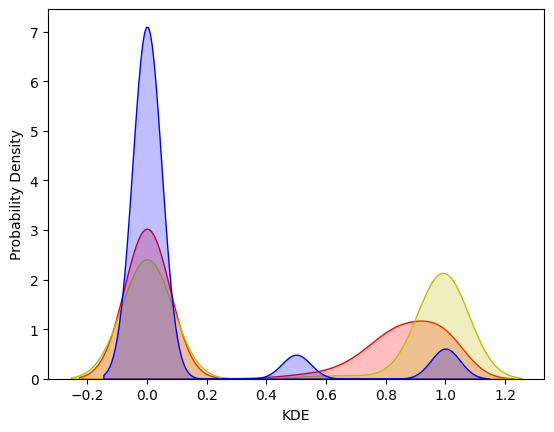

In [ ]:
print(sns.kdeplot(data=df, x='Winning_Ratio', color='r', shade=True))
print(sns.kdeplot(data=df, x='Starting_Price_Average', color='y', shade=True))
print(sns.kdeplot(data=df, x='Successive_Outbidding', color='b', shade=True))

plt.xlabel('KDE')
plt.ylabel('Probability Density')

As for Successive_Outbidding variable, it's not ouliers but data is represented by only 3 values 0, 0.5 and 1. As number of 0 values are drastically higher than 0.5 and 1 it shows the values as outliers.

Successive_Outbidding
0.0    5478
1.0     469
0.5     374
Name: count, dtype: int64
count    6321.000000
mean        0.103781
std         0.279698
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Successive_Outbidding, dtype: float64
Axes(0.125,0.11;0.775x0.77)


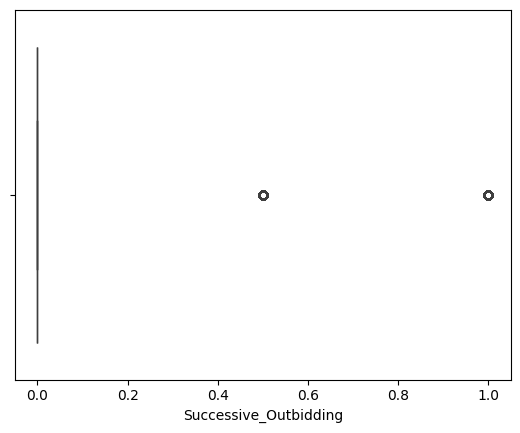

In [ ]:
print(df.Successive_Outbidding.value_counts())
print(df.Successive_Outbidding.describe())
print(sns.boxplot(data=df, x='Successive_Outbidding'))

3. Data Preparation

In [ ]:
df1 = df[['Auction_ID','Auction_Duration']]
df2 = df.drop(columns = ['Auction_ID','Auction_Duration'])
minmax = MinMaxScaler().fit(df1)
minmax = minmax.transform(df1)

In [ ]:
df2 = df2.reset_index()

In [ ]:
df1 = pd.DataFrame(minmax, columns = ['Auction_ID','Auction_Duration'])
df1

,Auction_ID,Auction_Duration
0,0.287011,0.444444
1,0.287011,0.444444
2,0.287011,0.444444
3,0.287011,0.444444
4,0.353336,0.666667
...,...,...
6316,0.298066,0.222222
6317,0.977497,0.666667
6318,0.977497,0.666667
6319,0.977497,0.666667


 I will be using normalization is that most of the features are already ranged between 0 and 1 except Auction_ID and Auction_Duration, therefore I will scale only these two features.

In [ ]:
df = df1.join(df2, how='outer')
index = df2['Record_ID']
df = df.set_index('Record_ID')
df

,Auction_ID,Auction_Duration,index,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
Record_ID,,,,,,,,,,,,
1,0.287011,0.444444,0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,0
2,0.287011,0.444444,1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,0
3,0.287011,0.444444,2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,0
4,0.287011,0.444444,3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,0
5,0.353336,0.666667,4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15129,0.298066,0.222222,6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,1
15137,0.977497,0.666667,6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,0
15138,0.977497,0.666667,6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,0


Features importances

So now to extract the Important Features, We will be doing Feature selection for that We will be using Decision Tree Classifier

In [ ]:
X = df.drop(columns = 'Class')
y = df['Class']

In [ ]:
cls = DecisionTreeClassifier()
cls.fit(X, y)

DecisionTreeClassifier()

In [ ]:
importances = cls.feature_importances_
columns = X.columns
columns

Index(['Auction_ID', 'Auction_Duration', 'index', 'Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio'],
      dtype='object')

Text(0, 0.5, 'Percentage of importances')

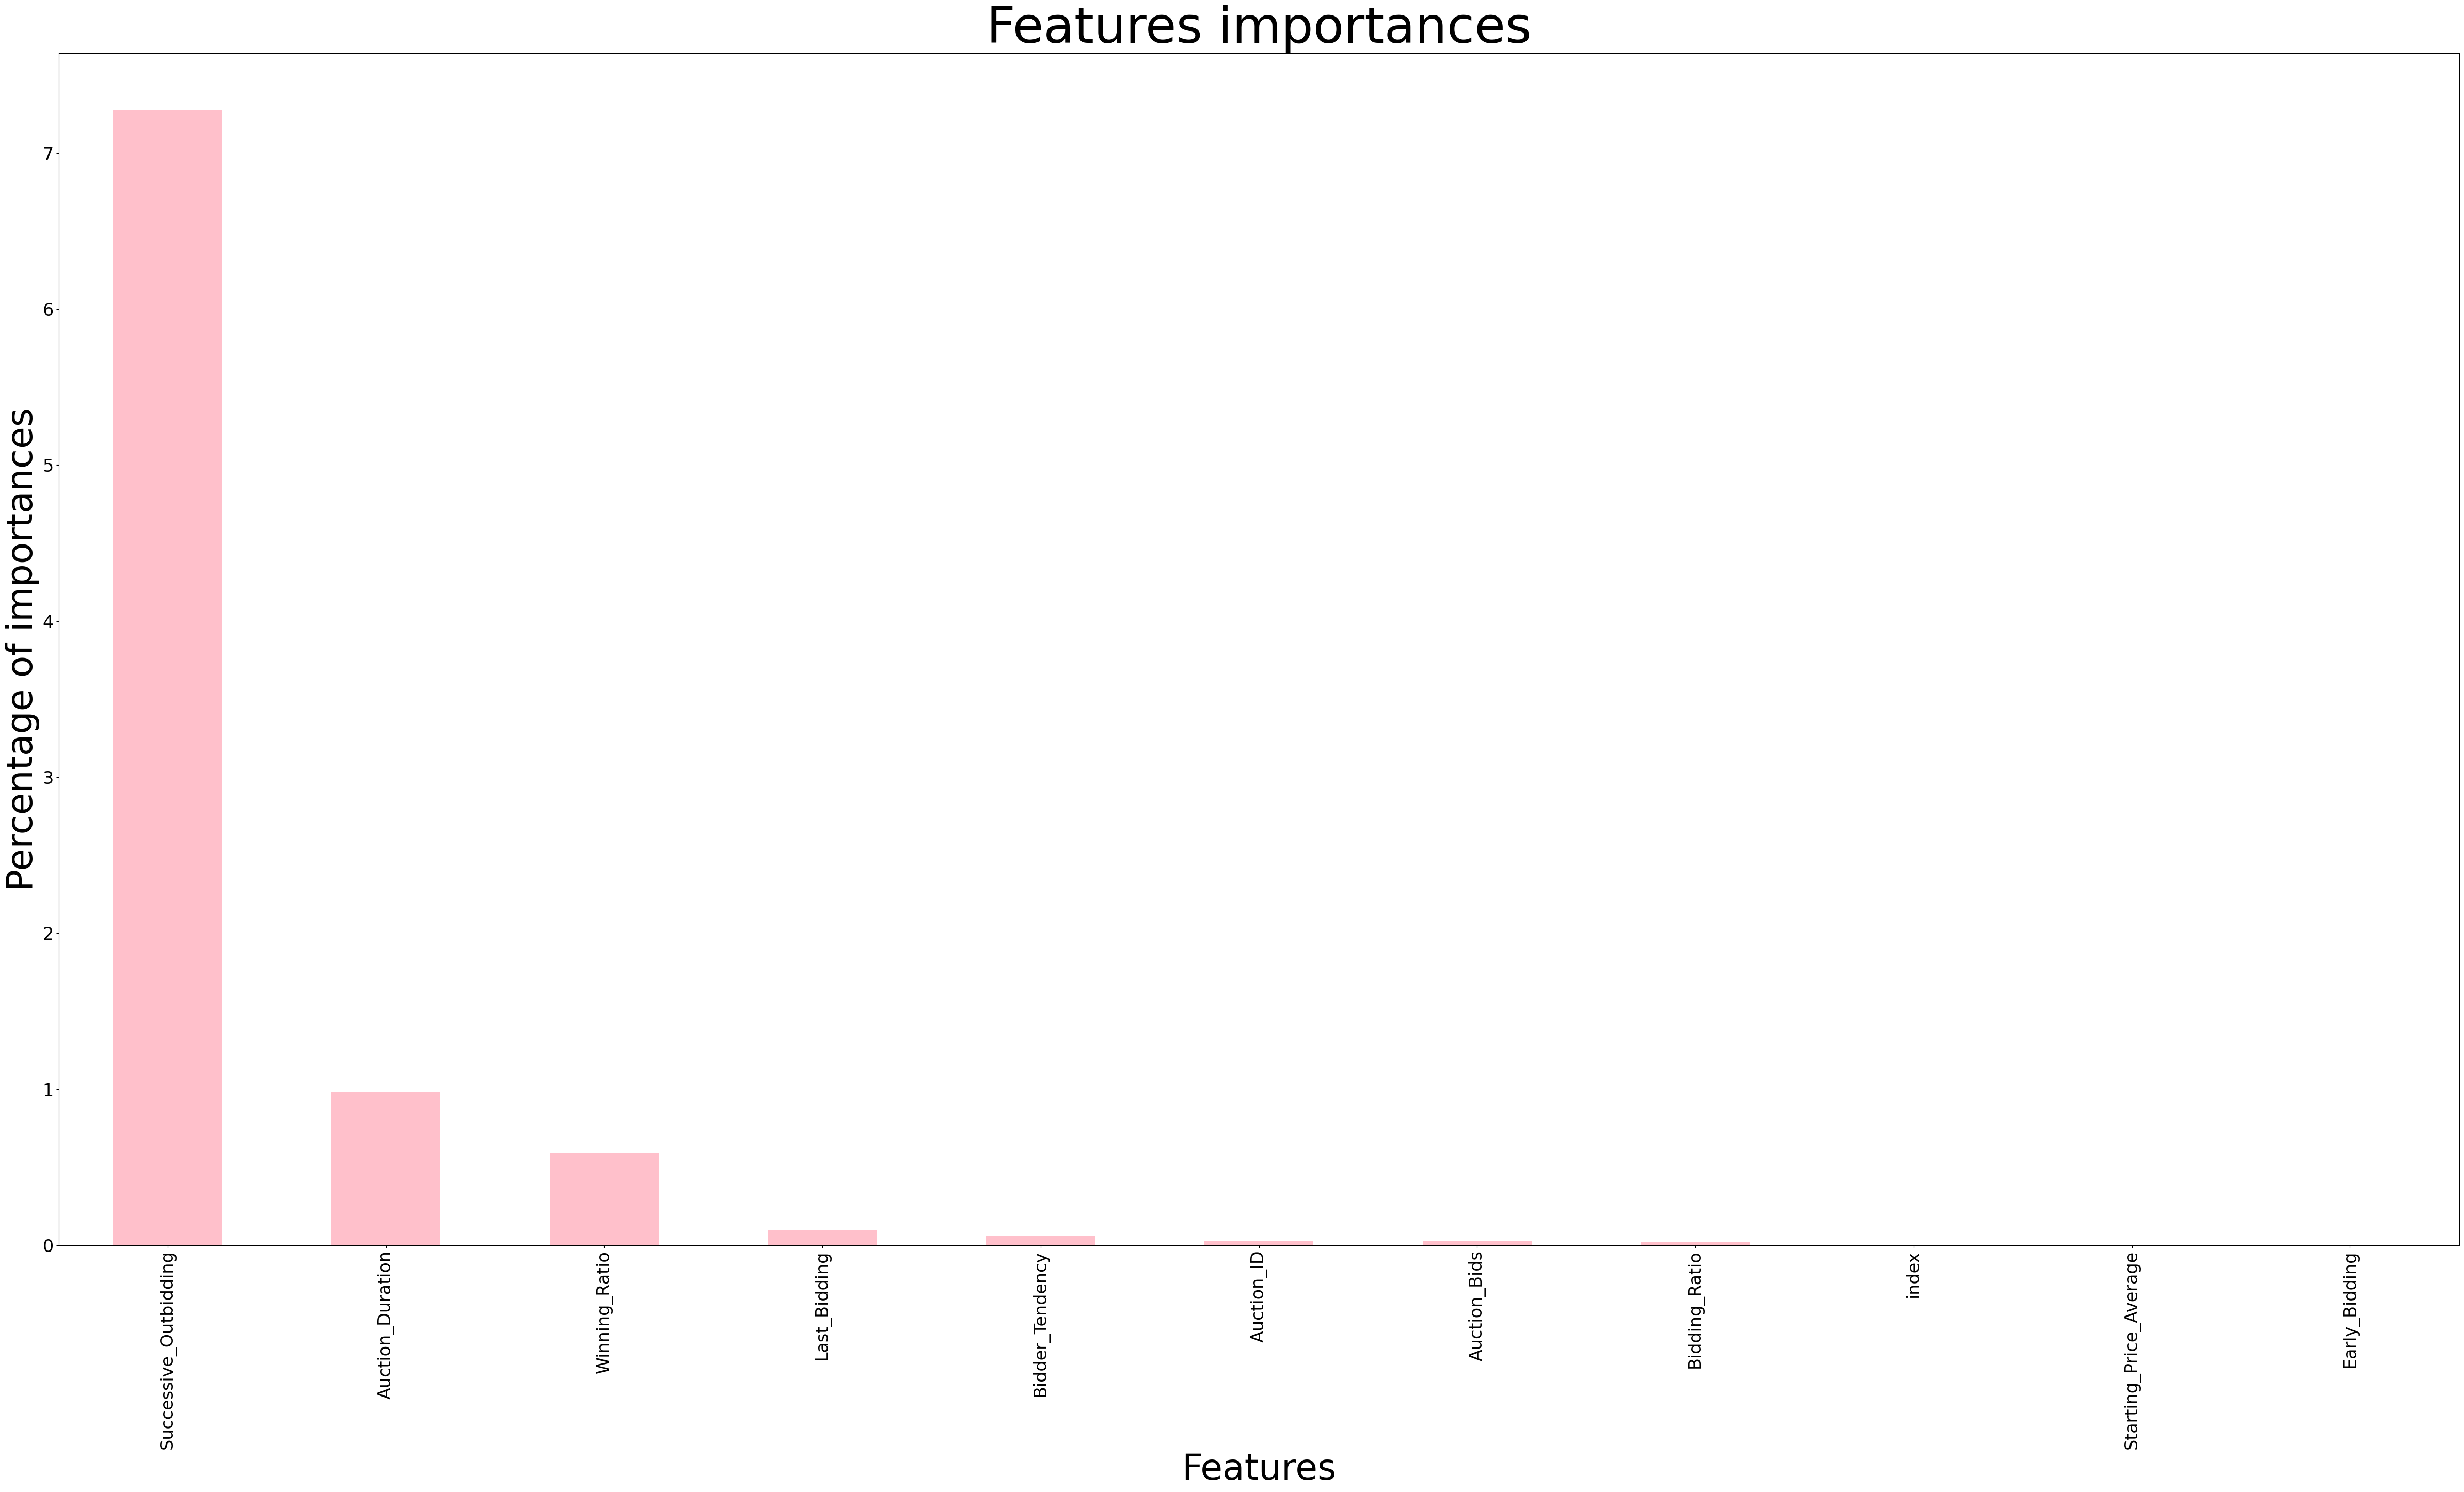

In [ ]:
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=columns)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

# plotting features importances
g = df_import['Percentage'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'pink')
g.set_title('Features importances', fontsize=70)
g.set_xlabel('Features', fontsize=50)
g.set_ylabel('Percentage of importances', fontsize=50)

We see that three the most important features for predicting the target variable are:

Successive_Outbidding;
Auction_Duration;
Winning_Ratio,
and the less important are:

Starting_Price_Average;
Auction_ID;
Early_Bidding.

Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
# Make predictions
y_pred = linear_reg.predict(X_test)
# Calculate R-squared (accuracy) without PCA
accuracy_without_pca = r2_score(y_test, y_pred)
print("R-squared (Accuracy) without PCA:", accuracy_without_pca)

R-squared (Accuracy) without PCA: 0.7802434505915196


An R-squared value of 0.7802 indicates a relatively good fit for the linear regression.

Apply PCA

Text(0, 0.5, 'Cumulative explained variance')

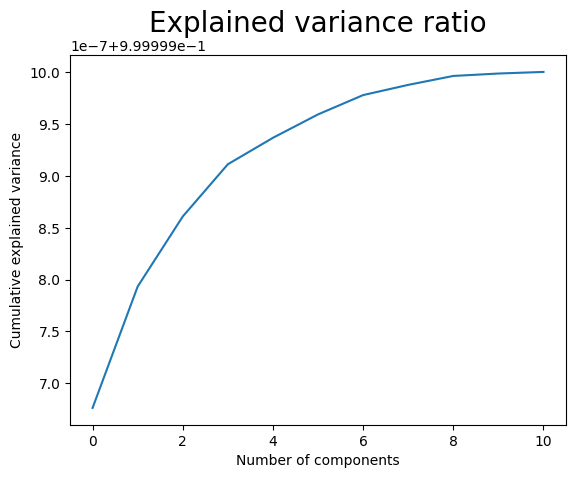

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained variance ratio', fontsize = 20)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

From the graph above we see that in order to keep 90% of the original data we need to use 6 components.

In [ ]:
pca = PCA(n_components=6)
projected = pca.fit_transform(X)

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Calculate variance before PCA
variance_before_pca = X_train_scaled.var(axis=0).sum()

In [ ]:
# Initialize PCA
pca = PCA(n_components=0.95) # Retain 95% of variance

In [ ]:
# Apply PCA on training data
X_train_pca = pca.fit_transform(X_train_scaled)

In [ ]:
# Calculate variance after PCA
variance_after_pca = pca.explained_variance_ratio_.sum()

In [ ]:
# Train linear regression model on original data
model_orig = LinearRegression()
model_orig.fit(X_train_scaled, y_train)
# Predict on test data using original model
y_pred_orig = model_orig.predict(X_test_scaled)
mse_orig = mean_squared_error(y_test, y_pred_orig)
# Train linear regression model on PCA-transformed data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
# Predict on test data using PCA model
X_test_pca = pca.transform(X_test)
y_pred_pca = model_pca.predict(X_test_pca)
mse_pca = mean_squared_error(y_test, y_pred_pca)
print("Mean Squared Error before PCA:", mse_orig)
print("Mean Squared Error after PCA:", mse_pca)
print("Variance before PCA:", variance_before_pca)
print("Variance after PCA:", variance_after_pca)

Mean Squared Error before PCA: 0.02053830586532192
Mean Squared Error after PCA: 21.056445816411316
Variance before PCA: 11.0
Variance after PCA: 0.9724677124520119


The linear regression model performs significantly better without PCA, as indicated by the lower Mean Squared Error (MSE) before PCA (0.0205) compared to after PCA (21.0564). This suggests that PCA introduces information loss, outweighing its benefits of reducing dimensionality.

Hence from above analysis Retaining the original features yields superior predictive performance" means that using the original set of features without applying dimensionality reduction techniques such as PCA results in better predictive accuracy for the model.

LDA

In [ ]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Scale the features if needed
# Assuming 'X_train_scaled' and 'X_test_scaled' are your scaled training and testing sets

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier (e.g., logistic regression) on the transformed features
classifier = LogisticRegression()
classifier.fit(X_train_lda, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test_lda)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with logistic regression:", accuracy)


Accuracy with logistic regression: 0.9707509881422924


The logistic regression model achieves an accuracy of approximately 97.08% on the testing set after preprocessing and applying Linear Discriminant Analysis (LDA) for dimensionality reduction.

The logistic regression model achieves an accuracy of approximately 97.08% on the testing set after preprocessing and applying Linear Discriminant Analysis (LDA) for dimensionality reduction. This high accuracy indicates that the model is effective at predicting the target variable. Further evaluation, such as examining precision, recall, and F1-score, could provide additional insights into the model's performance across different classes.

In [ ]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_lda, y_train)

# Predict on the testing set
y_pred = regression_model.predict(X_test_lda)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
accuracy_with_lda = r2_score(y_test, y_pred)
print("R-squared (Accuracy with linear regression) :", accuracy_with_lda)

Mean Squared Error: 0.020538305865321942
R-squared (Accuracy with linear regression) : 0.7802434505915188


Conclusion for the result :

Both linear regression models perform similarly in terms of prediction accuracy and explanatory power, as indicated by the comparable MSE and R-squared values. These results suggest that the addition of LDA for dimensionality reduction does not significantly affect the performance of the linear regression models in this context.

SVD

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC

In [ ]:
# Define the pipeline with SVD, scaling, and classifier
pipeline = make_pipeline(
    StandardScaler(),
    TruncatedSVD(n_components=10),  # Adjust number of components as needed
    SVC()  # Replace with your classifier of choice
)

In [ ]:
# Evaluate the pipeline using cross-validation
accuracy_scores = cross_val_score(pipeline, X, y, cv=5)  # Adjust cv as needed

In [ ]:
# Print the accuracy scores
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy:", accuracy_scores.mean())

Accuracy scores: [0.9826087  0.99050633 0.98259494 0.98734177 0.98101266]
Mean accuracy: 0.9848128783709411


In [ ]:
# Initialize SVD
svd = TruncatedSVD(n_components=2)

# Apply SVD to the data
X_svd = svd.fit_transform(X)

# Split the data into train and test sets
X_train_svd, X_test_svd, y_train, y_test = train_test_split(X_svd, y, test_size=0.2, random_state=42)

# Build a linear regression model using SVD-transformed data
model_svd = LinearRegression()
model_svd.fit(X_train_svd, y_train)

# Predict on the test set
y_pred_svd = model_svd.predict(X_test_svd)

# Evaluate the model
mse_svd = mean_squared_error(y_test, y_pred_svd)
print("Mean Squared Error (SVD):", mse_svd)

Mean Squared Error (SVD): 0.09179336073164289


In [ ]:
print("Comparative Analysis of Dimensionality reduction:")
print("Mean Squared Error (PCA):", mse_pca)
print("Mean Squared Error (LDA):", mse)
print("Mean Squared Error (SVD):", mse_svd)

Comparative Analysis of Dimensionality reduction:
Mean Squared Error (PCA): 21.056445816411316
Mean Squared Error (LDA): 0.020538305865321942
Mean Squared Error (SVD): 0.09179336073164289


FINAL RESULT CONCLUSION :

LDA yields the lowest MSE (0.0205), indicating the best predictive performance among the three techniques.

SVD follows with an MSE of 0.0918, which is higher than LDA but lower than PCA.

PCA has the highest MSE of 21.0564, indicating the least effective performance in terms of predictive accuracy.


Therefore, in terms of predictive performance as measured by MSE, Linear Discriminant Analysis (LDA) appears to be the best dimensionality reduction technique among the options provided.